In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import math

In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [2]:
df= pd.read_excel('C:/Users/HP/Desktop/University/Level 7/AI/Assignment/Assignment3/dataset.xlsx') 
df

,CATEGORY,ITEM,CALORIES,TYPE,PRICE
0,STARTER,Dynamite shrimp,770.0,Vegetarian,74
1,STARTER,Halloumi fries,530.0,Vegetarian,48
2,STARTER,Baked eggplant,270.0,Vegan,36
3,STARTER,Fish cake,480.0,Vegetarian,60
4,STARTER,Lentil soup,290.0,Vegan,26
...,...,...,...,...,...
63,COLD DRINK,Ice Latte,160.0,Vegetarian,18
64,COLD DRINK,Large Water,0.0,Vegan,10
65,COLD DRINK,Small Water,0.0,Vegan,10
66,COLD DRINK,Raspberry Mojito,129.4,Vegan,28


In [3]:
#Solution representation. 
#STARTER	 0-11
#MAIN COURSE	 12-29
#DESSERT	 30-47
#HOT DRINK	 48-55
#COLD DRINK	 56-67
#Representation of individuals = [STARTER,MAIN COURSE,DESSERT,HOT DRINK,COLD DRINK]

In [41]:
#Fitness function
#TYPE:0.4, PRICE:0.4, CALORIES:0.2

def Fitness(Pk):
        Fitness=[]
        typeError= 0
        totslCalories = 0
        totalPrice = 0

        #For each cromosome
        for index, row in Pk.iterrows():
            typeError= 0
            totslCalories = 0
            totalPrice = 0
            
            #For each gene
            for x in range(5):
                if row[x] == -1 :
                    continue
                index = row[x]
                check = df.loc[ index:index ,  ]
                checkT= str(check.TYPE)
                
                #type
                if itemtype == "Vegan":
                    if itemtype not in checkT:
                        typeError += 1
                elif itemtype == "Vegetarian":
                    if itemtype not in checkT and "Vegan" not in checkT:
                        typeError += 1
                    
                #calories
                totslCalories+=int(check.CALORIES)
                
                #price
                totalPrice +=int(check.PRICE)
            
            typeF = 1 - (typeError / 5)

            if budget >= totalPrice:
                priceF = 1
            else:
                priceF = budget / totalPrice
            
            if calories >= totslCalories:
                calorieF = 1
            else:
                calorieF = calories / totslCalories 

            fitness = (typeF * 0.4) + (priceF * 0.4) + (calorieF * 0.2)
            Fitness.append(fitness)

        Pk["Fitness"]=Fitness

In [42]:
#Crossover
def Crossover(parent1, parent2):
    children = pd.DataFrame(columns=['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK','Fitness'])
    parent1 = parent1[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']].values.tolist()
    parent2 = parent2[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']].values.tolist()
    
    crossoverPoint = random.randint(1,5) 
 
    child1 = np.append(parent1[0][:crossoverPoint],parent2[0][crossoverPoint:])
    child2 = np.append(parent2[0][:crossoverPoint],parent1[0][crossoverPoint:])

    children = children.append({'STARTER':child1[0],'MAIN COURSE':child1[1],'DESSERT':child1[2],'HOT DRINK':child1[3],'COLD DRINK':child1[4]},ignore_index=True)
    children = children.append({'STARTER':child2[0],'MAIN COURSE':child2[1],'DESSERT':child2[2],'HOT DRINK':child2[3],'COLD DRINK':child2[4]},ignore_index=True)
    children[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']] = children[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']].astype(int)
    children['Fitness'] = children['Fitness'].fillna(0)
    
    #Compute fitness 
    Fitness(children)
    return children

In [43]:
#Roulette wheel selection
def Selection(Pk):
    sum_of_fitness = 0
    for i in range(len(Pk)):
        sum_of_fitness += Pk['Fitness'][i]

    r = random.rand()
    summ = 0
    i=0
    for i in range(len(Pk)):
        summ = summ + (Pk['Fitness'][i]/sum_of_fitness)
        if r<summ:
            return Pk.loc[[i]]   

In [44]:
#Mutation
def Mutation(Pk2):
    cromosome = random.randint(0,len(Pk2))
    mutationPoint=  random.randint(0,5)
    mutation = random.randint(0,2)

    if mutation == 0:
        Pk2.ix[cromosome,mutationPoint] =  -1
    else:
        if mutationPoint == 0:
            Pk2.ix[cromosome,mutationPoint] = random.randint(0,12)
        elif mutationPoint == 1:
            Pk2.ix[cromosome,mutationPoint] = random.randint(12,30)
        elif mutationPoint == 2:
            Pk2.ix[cromosome,mutationPoint] = random.randint(30,48)
        elif mutationPoint == 3:
            Pk2.ix[cromosome,mutationPoint] = random.randint(48,56)
        else:
            Pk2.ix[cromosome,mutationPoint] = random.randint(56,68)
    #Compute fitness
    Fitness(Pk2)

In [45]:
#Replacement
#Replace with the worest parant
def Replacement(Pk,Pk2):
    #delete similarity with parent
    for i in range(len(Pk)):
        for j in range(len(Pk2)):
            if Pk['STARTER'][i]==Pk2['STARTER'][j] and Pk['MAIN COURSE'][i]==Pk2['MAIN COURSE'][j] and Pk['DESSERT'][i]==Pk2['DESSERT'][j] and Pk['HOT DRINK'][i]==Pk2['HOT DRINK'][j] and Pk['COLD DRINK'][i]==Pk2['COLD DRINK'][j]:
                Pk2 = Pk2.drop([j])
                
        Pk2.reset_index(inplace=True)
        Pk2.drop(columns=['index'], inplace=True)

    #delete similarity with children
    length = len(Pk2)
    for i in range(length):
        if i >= len(Pk2):
            break
        for j in range(len(Pk2)):
            if Pk2['STARTER'][i]==Pk2['STARTER'][j] and Pk2['MAIN COURSE'][i]==Pk2['MAIN COURSE'][j] and Pk2['DESSERT'][i]==Pk2['DESSERT'][j] and Pk2['HOT DRINK'][i]==Pk2['HOT DRINK'][j] and Pk2['COLD DRINK'][i]==Pk2['COLD DRINK'][j] and i != j:
                Pk2 = Pk2.drop([j])
                
        Pk2.reset_index(inplace=True)
        Pk2.drop(columns=['index'], inplace=True)

    Pk.sort_values(by=['Fitness'], ascending=True, inplace=True)
    Pk2.sort_values(by=['Fitness'], ascending=False, inplace=True)
    
    Pk.reset_index(inplace=True)
    Pk.drop(columns=['index'], inplace=True)
    Pk2.reset_index(inplace=True)
    Pk2.drop(columns=['index'], inplace=True)
    
    replacment = pd.DataFrame(columns=['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK','Fitness'])
    for i in range(len(Pk)):
        if i < len(Pk2):
            if Pk['Fitness'][i]<Pk2['Fitness'][i]:
                replacment =  replacment.append(Pk2.iloc[i])
            else:
                replacment = replacment.append(Pk.iloc[i]) 
        else:
            replacment = replacment.append(Pk.iloc[i]) 
    replacment[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']] = replacment[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']].astype(int)
    return replacment       

In [46]:
#n: number of individuals in the population
#c: crossover rate
#m: mutation rate
#k: #number of generation
#fitnessAvg
def GA(n, c, m, itemtype, budget, calories):
    k = 0
    fitnessAvg = pd.DataFrame(columns=['Fitness'])
    totalFitness = 0
    Pk = pd.DataFrame(columns=['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK','Fitness'])
    Pk2 = pd.DataFrame(columns=['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK','Fitness'])

#____________________________________________________________________
    #1- Initialize first generation randomly
    for i in range(n):
        Pk = Pk.append({'STARTER':random.randint(0,12),'MAIN COURSE':random.randint(12,30),'DESSERT':random.randint(30,48),'HOT DRINK':random.randint(48,56),'COLD DRINK':random.randint(56,68)},ignore_index=True)
    Pk[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']] = Pk[['STARTER','MAIN COURSE','DESSERT','HOT DRINK','COLD DRINK']].astype(int)
    Pk['Fitness'] = Pk['Fitness'].fillna(0)
    #print(Pk)
#____________________________________________________________________
    
    #2- Compute fitness 
    Fitness(Pk)
    for i in range(n):
        totalFitness += Pk['Fitness'][i] 
    fitnessAvg = fitnessAvg.append({'Fitness':totalFitness/n},ignore_index=True)  

    Pk.sort_values(by=['Fitness'], ascending=False, inplace=True) 
    Pk.reset_index(inplace=True)
    Pk.drop(columns=['index'], inplace=True)
    if Pk['Fitness'][0] == 1:
        flag = False
    else:
        flag = True
             
    #Start generation
    while (flag):
        #3- Crossover
        #Roulette wheel selection parent
        for i in range(math.ceil(c*n/2)):
            Pk2 = Pk2.append(Crossover(Selection(Pk), Selection(Pk)))
            
        Pk2.reset_index(inplace=True)
        Pk2.drop(columns=['index'], inplace=True)
       
        #4- Mutation
        for i in range(math.ceil(m*n)):
            Mutation(Pk2)

        #5- Replacement 
        #new generation
        Pk = Replacement(Pk,Pk2)

        #6- Compute fitness 
        totalFitness = 0
        for i in range(len(Pk)):
            totalFitness += Pk['Fitness'][i] 
        fitnessAvg = fitnessAvg.append({'Fitness':totalFitness/n},ignore_index=True)   
        Pk2 = Pk2[0:0]
        
        #7- Termination condition
        Pk.sort_values(by=['Fitness'], ascending=False, inplace=True) 
        Pk.reset_index(inplace=True)
        Pk.drop(columns=['index'], inplace=True)
        
        if Pk['Fitness'][0] == 1:
            flag = False
        elif len(fitnessAvg) >= 10:
            if fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-2] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-3] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-4] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-5] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-6] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-7] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-8] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-9] and fitnessAvg["Fitness"][len(fitnessAvg)-1] == fitnessAvg["Fitness"][len(fitnessAvg)-10]:
                   flag = False
        else:
            flag = True
        
     
    print("The best meal is:")
    if(Pk["STARTER"][0] != -1):
        print(df.iloc[Pk["STARTER"][0]])
    if(Pk["MAIN COURSE"][0] != -1):
        print(df.iloc[Pk["MAIN COURSE"][0]])
    if(Pk["DESSERT"][0] != -1):
        print(df.iloc[Pk["DESSERT"][0]])
    if(Pk["HOT DRINK"][0] != -1):
        print(df.iloc[Pk["HOT DRINK"][0]])
    if(Pk["COLD DRINK"][0] != -1):
        print(df.iloc[Pk["COLD DRINK"][0]])
    print("Fitness",[Pk["Fitness"][0]])
    #7- Plot
    plt.plot(fitnessAvg)
    plt.title('GA Performance')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.show() 

In [10]:
#user input
validItem = True

while validItem:
    itemtype = input("Please enter the number of type  (1:Vegetarian  | 2:Vegan  | 3:Regular ): ") 
    if  itemtype.isnumeric(): 
        itemtype = int(itemtype)
    else:
        print("Sorry, your input should be number !! (1:Vegetarian  | 2:Vegan  | 3:Regular )")
        continue   
    
    if itemtype == 1:
        itemtype = 'Vegetarian'
        validItem= False
    elif itemtype == 2:
        itemtype = 'Vegan'
        validItem= False
    elif itemtype == 3: 
        itemtype = 'Regular'
        validItem= False     
    else:
        print("Sorry, your input should be number either (1:Vegetarian  | 2:Vegan  | 3:Regular )")
    

#---------------------------------------------------------------------------------------------------------------        
validBudget = True

while  validBudget:
    budget = input('enter budget:')
    
    if  budget.isnumeric():
        budget = float(budget)
    else:
        print(" your budget should  be number and not negative !!") 
        continue
        
    if budget >= 0 :
        validBudget= False
  
    else:
        print(" your budget should not be negative !!")  
        

validCalories = True

while  validCalories:
    calories = input('enter calories:')
    
    if  calories.isnumeric():
        calories = float(calories)
    else:
        print(" your calories should  be number and not negative !!") 
        continue
        
    if float(calories) >= 0 :
        validCalories= False  
    else:
        print(" your calories should not be negative !!")    

Please enter the number of type  (1:Vegetarian  | 2:Vegan  | 3:Regular ): 3
enter budget:100
enter calories:500


In [11]:
#combinations: 10,40,70/ 0.99,0.98,0.97/ 0.01,0.02,0.03 = 27

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


The best meal is:
CATEGORY                          DESSERT
ITEM        Signature Apricot almond tart
CALORIES                              334
TYPE                                Vegan
PRICE                                  68
Name: 46, dtype: object
CATEGORY    HOT DRINK
ITEM        Black tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 53, dtype: object
CATEGORY      COLD DRINK
ITEM        Orange Juice
CALORIES             130
TYPE               Vegan
PRICE                 16
Name: 60, dtype: object
Fitness [1.0]


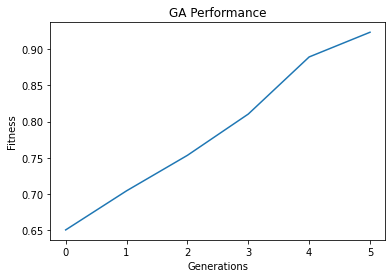

In [48]:
#combination 1
n = 10
c = 0.99
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1

The best meal is:
CATEGORY     HOT DRINK
ITEM        Cafe Latte
CALORIES           190
TYPE        Vegetarian
PRICE               19
Name: 51, dtype: object
Fitness [1.0]


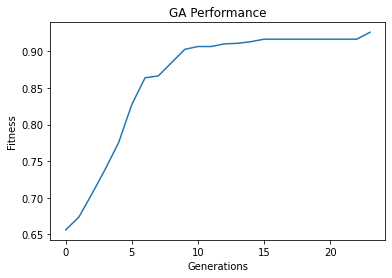

In [13]:
#combination 2
n = 10
c = 0.99
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipyke

The best meal is:
CATEGORY          COLD DRINK
ITEM        Blueberry Mojito
CALORIES                 136
TYPE                   Vegan
PRICE                     30
Name: 67, dtype: object
Fitness [1.0]


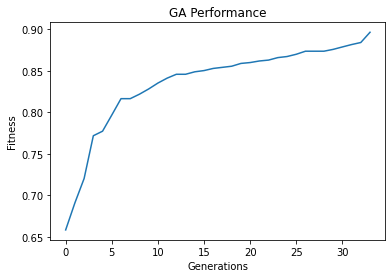

In [39]:
#combination 3
n = 10
c = 0.99
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipyker

The best meal is:
CATEGORY    HOT DRINK
ITEM        Black tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 53, dtype: object
Fitness [1.0]


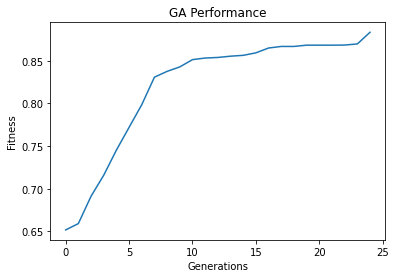

In [15]:
#combination 4
n = 10
c = 0.98
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Us

The best meal is:
CATEGORY           STARTER
ITEM        Baked eggplant
CALORIES               270
TYPE                 Vegan
PRICE                   36
Name: 2, dtype: object
Fitness [1.0]


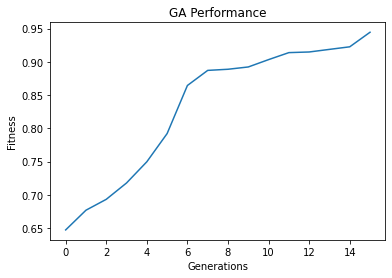

In [16]:
#combination 5
n = 10
c = 0.98
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


The best meal is:
CATEGORY                    DESSERT
ITEM        Assorted fruits platter
CALORIES                        238
TYPE                          Vegan
PRICE                            22
Name: 40, dtype: object
CATEGORY    HOT DRINK
ITEM        Americano
CALORIES           15
TYPE            Vegan
PRICE              18
Name: 48, dtype: object
CATEGORY     COLD DRINK
ITEM        Large Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 64, dtype: object
Fitness [1.0]


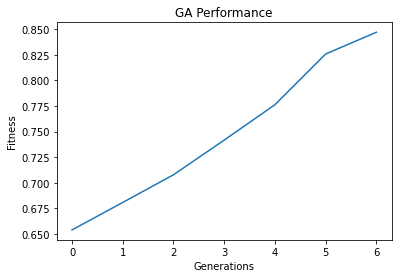

In [17]:
#combination 6
n = 10
c = 0.98
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


The best meal is:
CATEGORY         STARTER
ITEM        Quinoa salad
CALORIES             320
TYPE               Vegan
PRICE                 36
Name: 8, dtype: object
CATEGORY    COLD DRINK
ITEM           Mirinda
CALORIES            90
TYPE             Vegan
PRICE               10
Name: 59, dtype: object
Fitness [1.0]


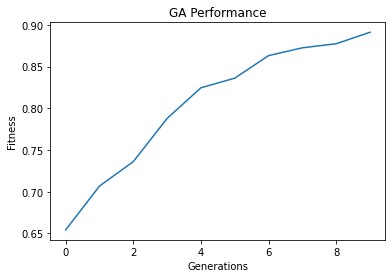

In [18]:
#combination 7
n = 10
c = 0.97
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


The best meal is:
CATEGORY       STARTER
ITEM        Kale salad
CALORIES           280
TYPE             Vegan
PRICE               38
Name: 7, dtype: object
CATEGORY    HOT DRINK
ITEM        Black tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 53, dtype: object
CATEGORY              COLD DRINK
ITEM        Strawberry milkshake
CALORIES                     210
TYPE                  Vegetarian
PRICE                         20
Name: 61, dtype: object
Fitness [1.0]


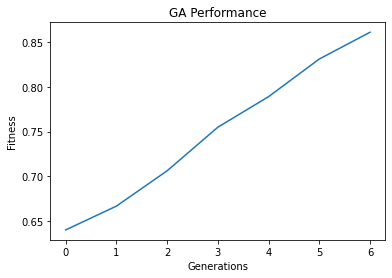

In [19]:
#combination 8
n = 10
c = 0.97
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Ple

The best meal is:
CATEGORY       STARTER
ITEM        Kale salad
CALORIES           280
TYPE             Vegan
PRICE               38
Name: 7, dtype: object
CATEGORY    HOT DRINK
ITEM         Espresso
CALORIES            9
TYPE            Vegan
PRICE              13
Name: 49, dtype: object
CATEGORY    COLD DRINK
ITEM           Mirinda
CALORIES            90
TYPE             Vegan
PRICE               10
Name: 59, dtype: object
Fitness [1.0]


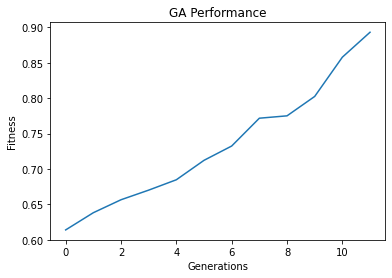

In [20]:
#combination 9
n = 10
c = 0.97
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix 

The best meal is:
CATEGORY       STARTER
ITEM        Kale salad
CALORIES           280
TYPE             Vegan
PRICE               38
Name: 7, dtype: object
CATEGORY     HOT DRINK
ITEM        Cappuccino
CALORIES           120
TYPE        Vegetarian
PRICE               19
Name: 50, dtype: object
CATEGORY    COLD DRINK
ITEM        Diet Pepsi
CALORIES             0
TYPE             Vegan
PRICE               10
Name: 57, dtype: object
Fitness [1.0]


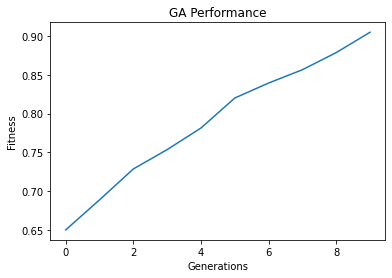

In [40]:
#combination 10
n = 40
c = 0.99
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1

The best meal is:
CATEGORY        HOT DRINK
ITEM        Hot Chocolate
CALORIES              350
TYPE           Vegetarian
PRICE                  21
Name: 55, dtype: object
Fitness [1.0]


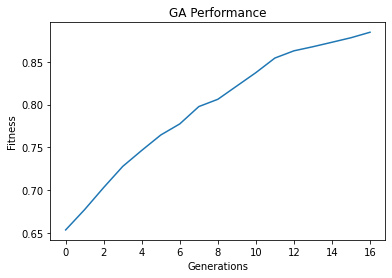

In [22]:
#combination 11
n = 40
c = 0.99
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1

The best meal is:
CATEGORY        STARTER
ITEM        Lentil soup
CALORIES            290
TYPE              Vegan
PRICE                26
Name: 4, dtype: object
CATEGORY    HOT DRINK
ITEM         Espresso
CALORIES            9
TYPE            Vegan
PRICE              13
Name: 49, dtype: object
CATEGORY    COLD DRINK
ITEM        Diet Pepsi
CALORIES             0
TYPE             Vegan
PRICE               10
Name: 57, dtype: object
Fitness [1.0]


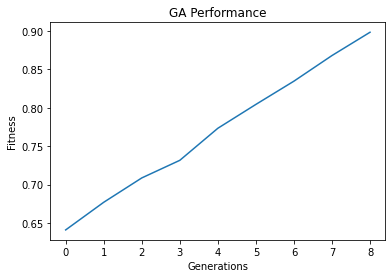

In [23]:
#combination 12
n = 40
c = 0.99
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix 

The best meal is:
CATEGORY         STARTER
ITEM        Chicken soup
CALORIES             280
TYPE             Regular
PRICE                 32
Name: 5, dtype: object
CATEGORY     HOT DRINK
ITEM        Cafe Latte
CALORIES           190
TYPE        Vegetarian
PRICE               19
Name: 51, dtype: object
Fitness [1.0]


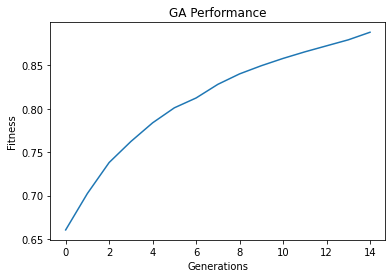

In [24]:
#combination 13
n = 40
c = 0.98
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipyke

The best meal is:
CATEGORY                    DESSERT
ITEM        Assorted fruits platter
CALORIES                        238
TYPE                          Vegan
PRICE                            22
Name: 40, dtype: object
CATEGORY    HOT DRINK
ITEM        Americano
CALORIES           15
TYPE            Vegan
PRICE              18
Name: 48, dtype: object
Fitness [1.0]


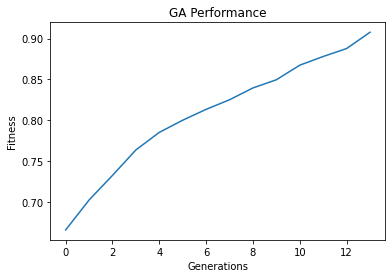

In [25]:
#combination 14
n = 40
c = 0.98
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix 

The best meal is:
CATEGORY    HOT DRINK
ITEM        Green tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 54, dtype: object
CATEGORY     COLD DRINK
ITEM        Large Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 64, dtype: object
Fitness [1.0]


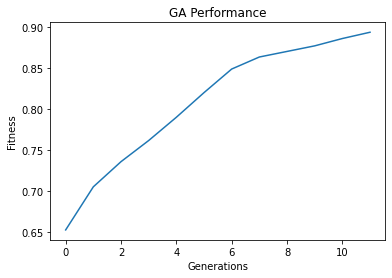

In [26]:
#combination 15
n = 40
c = 0.98
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Us

The best meal is:
CATEGORY                    DESSERT
ITEM        Assorted fruits platter
CALORIES                        238
TYPE                          Vegan
PRICE                            22
Name: 40, dtype: object
CATEGORY     HOT DRINK
ITEM        Cappuccino
CALORIES           120
TYPE        Vegetarian
PRICE               19
Name: 50, dtype: object
CATEGORY     COLD DRINK
ITEM        Large Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 64, dtype: object
Fitness [1.0]


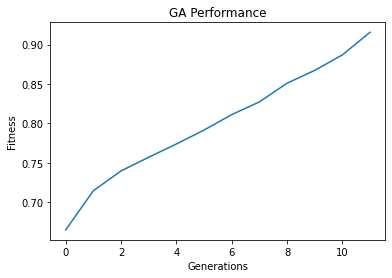

In [27]:
#combination 16
n = 40
c = 0.97
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\si

The best meal is:
CATEGORY    HOT DRINK
ITEM        Black tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 53, dtype: object
CATEGORY    COLD DRINK
ITEM             Pepsi
CALORIES           120
TYPE             Vegan
PRICE               10
Name: 56, dtype: object
Fitness [1.0]


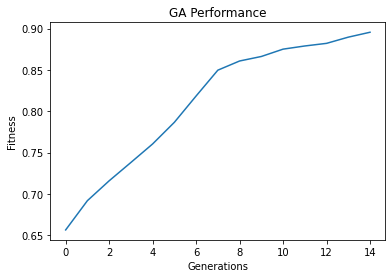

In [28]:
#combination 17
n = 40
c = 0.97
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Ple

The best meal is:
CATEGORY                    DESSERT
ITEM        Assorted fruits platter
CALORIES                        238
TYPE                          Vegan
PRICE                            22
Name: 40, dtype: object
CATEGORY    HOT DRINK
ITEM        Green tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 54, dtype: object
CATEGORY    COLD DRINK
ITEM        Diet Pepsi
CALORIES             0
TYPE             Vegan
PRICE               10
Name: 57, dtype: object
Fitness [1.0]


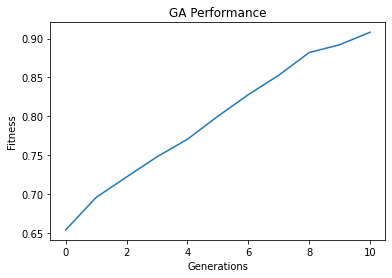

In [29]:
#combination 18
n = 40
c = 0.97
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipyker

The best meal is:
CATEGORY    HOT DRINK
ITEM        Black tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 53, dtype: object
CATEGORY     COLD DRINK
ITEM        Large Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 64, dtype: object
Fitness [1.0]


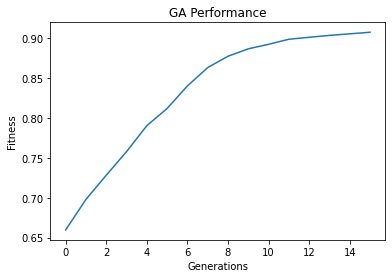

In [30]:
#combination 19
n = 70
c = 0.99
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernel

The best meal is:
CATEGORY    HOT DRINK
ITEM        Americano
CALORIES           15
TYPE            Vegan
PRICE              18
Name: 48, dtype: object
CATEGORY    COLD DRINK
ITEM               7up
CALORIES           120
TYPE             Vegan
PRICE               10
Name: 58, dtype: object
Fitness [1.0]


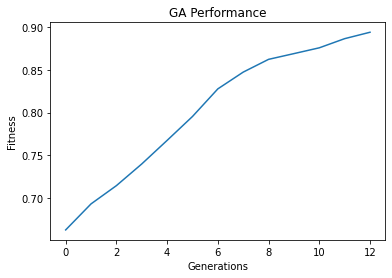

In [31]:
#combination 20
n = 70
c = 0.99
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix 

The best meal is:
CATEGORY        DESSERT
ITEM        Carrot Cake
CALORIES            290
TYPE         Vegetarian
PRICE                26
Name: 34, dtype: object
CATEGORY    HOT DRINK
ITEM         Espresso
CALORIES            9
TYPE            Vegan
PRICE              13
Name: 49, dtype: object
CATEGORY    COLD DRINK
ITEM               7up
CALORIES           120
TYPE             Vegan
PRICE               10
Name: 58, dtype: object
Fitness [1.0]


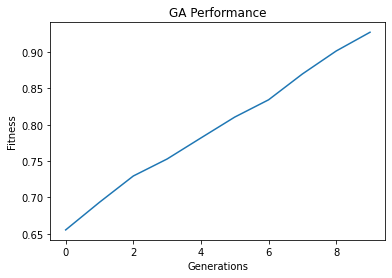

In [32]:
#combination 21
n = 70
c = 0.99
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix 

The best meal is:
CATEGORY         STARTER
ITEM        Chicken soup
CALORIES             280
TYPE             Regular
PRICE                 32
Name: 5, dtype: object
CATEGORY     COLD DRINK
ITEM        Small Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 65, dtype: object
Fitness [1.0]


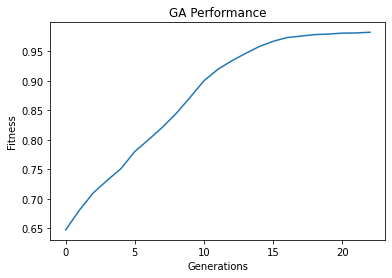

In [33]:
#combination 22
n = 70
c = 0.98
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Ple

The best meal is:
CATEGORY          STARTER
ITEM        Burrata salad
CALORIES              360
TYPE           Vegetarian
PRICE                  65
Name: 9, dtype: object
CATEGORY    HOT DRINK
ITEM        Green tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 54, dtype: object
CATEGORY    COLD DRINK
ITEM             Pepsi
CALORIES           120
TYPE             Vegan
PRICE               10
Name: 56, dtype: object
Fitness [1.0]


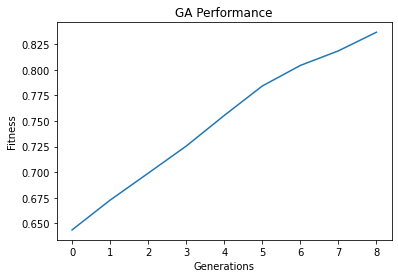

In [34]:
#combination 23
n = 70
c = 0.98
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1

The best meal is:
CATEGORY                    DESSERT
ITEM        Assorted fruits platter
CALORIES                        238
TYPE                          Vegan
PRICE                            22
Name: 40, dtype: object
CATEGORY    HOT DRINK
ITEM        Black tea
CALORIES            0
TYPE            Vegan
PRICE              15
Name: 53, dtype: object
CATEGORY     COLD DRINK
ITEM        Small Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 65, dtype: object
Fitness [1.0]


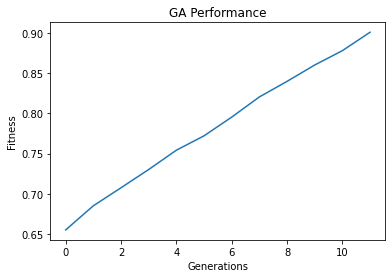

In [35]:
#combination 24
n = 70
c = 0.98
m = 0.03

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix 

The best meal is:
CATEGORY                    DESSERT
ITEM        Assorted fruits platter
CALORIES                        238
TYPE                          Vegan
PRICE                            22
Name: 40, dtype: object
CATEGORY     COLD DRINK
ITEM        Small Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 65, dtype: object
Fitness [1.0]


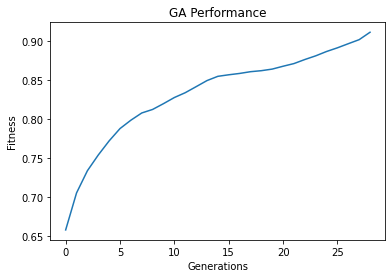

In [36]:
#combination 25
n = 70
c = 0.97
m = 0.01

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Us

The best meal is:
CATEGORY         STARTER
ITEM        Chicken soup
CALORIES             280
TYPE             Regular
PRICE                 32
Name: 5, dtype: object
CATEGORY     COLD DRINK
ITEM        Large Water
CALORIES              0
TYPE              Vegan
PRICE                10
Name: 64, dtype: object
Fitness [1.0]


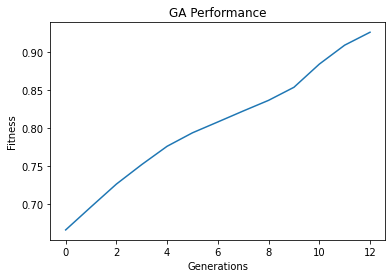

In [37]:
#combination 26
n = 70
c = 0.97
m = 0.02

GA(n,c,m,itemtype,budget,calories)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1

The best meal is:
CATEGORY        STARTER
ITEM        Lentil soup
CALORIES            290
TYPE              Vegan
PRICE                26
Name: 4, dtype: object
CATEGORY    HOT DRINK
ITEM        Americano
CALORIES           15
TYPE            Vegan
PRICE              18
Name: 48, dtype: object
CATEGORY    COLD DRINK
ITEM             Pepsi
CALORIES           120
TYPE             Vegan
PRICE               10
Name: 56, dtype: object
Fitness [1.0]


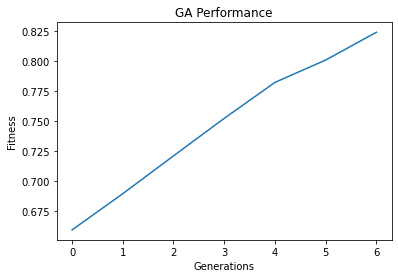

In [38]:
#combination 27
n = 70
c = 0.97
m = 0.03

GA(n,c,m,itemtype,budget,calories)